In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.shape

(891, 15)

In [4]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
titanic_semNA = titanic.dropna(subset=['age', 'deck'])

titanic_semNA.shape

(184, 15)

In [6]:
# Criando uma tabela que cruza dados com as colunas sex e alive:

titanic_semNA.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [7]:
# margins = True cria uma coluna, All, que me traz os valores totais em cada linha:

tab = pd.crosstab(titanic_semNA['sex'], titanic_semNA['survived'], margins=True)
tab

survived,0,1,All
sex,,,
female,6,84,90
male,53,41,94
All,59,125,184


In [8]:
# Calculando a probabilidade de sobrevivência para cada sexo:

tab["prob_sobrevivencia"] = round((tab[1] / tab['All']), 2)
tab

survived,0,1,All,prob_sobrevivencia
sex,,,,
female,6,84,90,0.93
male,53,41,94,0.44
All,59,125,184,0.68


In [9]:
# A chance é mensurada a partir da razão da ocorrência do
# evento em relação ao seu complementar, isto é, de não ocorrer.
# Ou seja, aqui seria a quantidade de sobreviventes para o de não
# sobreviventes.

tab["chance_sobrevivencia"] = round((tab[1] / tab[0]), 2)
tab

survived,0,1,All,prob_sobrevivencia,chance_sobrevivencia
sex,,,,,
female,6,84,90,0.93,14.00
male,53,41,94,0.44,0.77
All,59,125,184,0.68,2.12


In [10]:
# Criando uma outra coluna, que me diz quantas vezes uma pessoa
# apresenta de sobreviver no acidente do titanic, com base na variável
# que apresenta a menor chance de sobrevivência, que são os homens.

tab["taxa_de_sobrevivencia"] = round((tab['chance_sobrevivencia'] / tab.loc["male", "chance_sobrevivencia"]),2)
tab

survived,0,1,All,prob_sobrevivencia,chance_sobrevivencia,taxa_de_sobrevivencia
sex,,,,,,
female,6,84,90,0.93,14.00,18.18
male,53,41,94,0.44,0.77,1.00
All,59,125,184,0.68,2.12,2.75


## 2. Regressão logística<a name="2"></a>

É a técnica estatística mais popular para modelagem preditiva de eventos binários. Assim como a regressão, é um modelo linear - o que significa que é definida por uma equação linear, ou seja uma equação da forma  

$g(y)=\alpha + \beta_1 x_1 + \beta_2 x_2 +...+ \beta_p x_p = \eta$  

Em que $\alpha, \beta_1, \beta_2,... \beta_p$ são constantes.

Portanto, a regressão logística compartilha uma série de características e ferramentas com os modelos de regressão linear, mas com particularidades para a resposta binária.

### 2.1 Função logística<a name="2.1"></a>

O *logito* é a *função de ligação* que modelamos na regressão logística. É definido como o **logaritmo da chance**, ou ainda:

$$logito=log\left(\frac{p}{1-p}\right) $$

O que nos dá a seguinte equação:

$$log\left(\frac{p}{1-p}\right) = \alpha + \beta_1 x_1 + \beta_2 x_2 +...+ \beta_p x_p$$

- Quando P se aproxima de 0, o logito *vai para* $-\infty$.  
- Quando P se aproxima de 1, o logito *vai para* $+\infty$.  
- Não se define quando P=0 ou quando P=1.

Vamos observar isso graficamente:

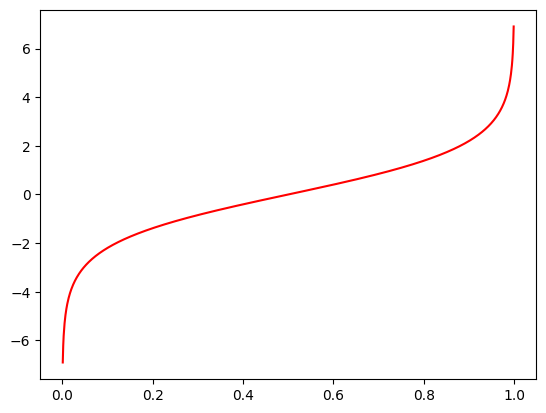

In [11]:
P = pd.Series(np.linspace(0.001,.999,1000))

logito = np.log(P/(1-P))

plt.plot(P, logito, 'r');

#### Transformação inversa do logito

O nosso modelo linear vai nos fornecer uma estimativa do logito para cada perfil de interesse. Podemos *voltar* na probabilidade com a função inversa do logito. Com um pouco de álgebra, chegamos nessa equação aqui:


$$
    p = \frac{1}{\left(1+e^{-\eta}\right)}
$$


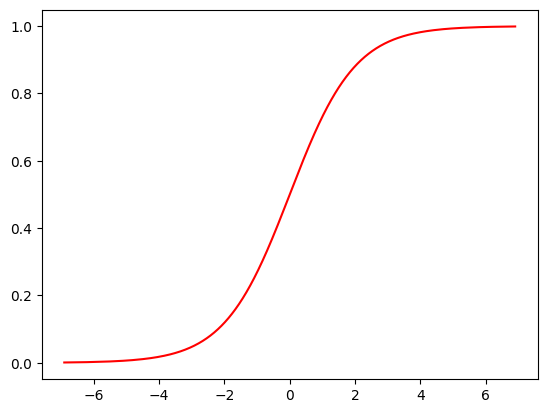

In [12]:
plt.plot(logito, P, 'r')

# A vantagem de se fazer a inversa da chance, para que consiga encontrar
# a probabilidade de um evento ocorrer é que assim conseguimos visualizar
# valores que se colocam sob um intervalo de 0 ou 1.

### 2.2 Regressão logística com uma variável <a name="2.2"></a>

A nossa regressão, como já falamos, é um modelo linear sobre uma função da probabilidade - essa função é o logito. Com uma variável, a equação da regressão logística que dá a probabilidade $P_i$ de default para cada cliente i=1, 2, ...N é:

$$ log\left(\dfrac{P_i}{\left(1-P_i\right)}\right) = \alpha + \beta x_i $$

Repare que se quisermos a chance para cada perfil, basta aplicar a função exponencial dos dois lados:

$$ \dfrac{P_i}{\left(1-P_i\right)} = e^{\alpha + \beta x_i} $$

Se quisermos as probabilidades, basta isolar o P na equação e obter:

$$ P_i = \dfrac{1}{1 + e^{- (\alpha + \beta x_i)}} $$



Vamos explorar a regressão logística com a variável do exemplo anterior para entender a equação.


In [13]:
import statsmodels.formula.api as smf

reglog = smf.logit("survived ~ sex",data=titanic).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.515041
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 Jan 2024   Pseudo R-squ.:                  0.2266
Time:                        15:12:41   Log-Likelihood:                -458.90
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.020e-60
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0566      0.129      8.191      0.000       0.804       1.309
sex[T.male]    -2.5137      0.167    -15.036      0.000      -2.841      -2.186
===============================================================================
"""

In [14]:
# Parâmetros do modelo, de tal modo que o Intercept é o alpha,
# enquanto que o sex[T.male] é o beta.

reglog.params

Intercept      1.056589
sex[T.male]   -2.513710
dtype: float64

In [15]:
# A partir desses parâmetros conseguimos, com base na função logística, encontrar
# a chance e a probabilidade de um evento acontecer ou não:

# Chance logito = e^(eta)
# ; em que eta = aplha + beta*x :

eta = reglog.params[0] + reglog.params[1]

chance = round(np.exp(eta),2)
print(f"A chance do evento ocorrer é de {chance}.")

A chance do evento ocorrer é de 0.23.


In [16]:
probabilidade = round((1 / (1 + np.exp(-eta))),2)
print(f"A probabilidade do evento ocorrer é de {probabilidade}.")


A probabilidade do evento ocorrer é de 0.19.


**Análise para mais de uma variável:**

In [17]:
# Lembrando que colocando o "C", como fiz em C(pclass), faz
# com que eu categorize a variável.

reglog = smf.logit(" survived ~ sex + C(pclass) + fare"
                   , data=titanic).fit()

reglog.summary()

Optimization terminated successfully.
         Current function value: 0.463592
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Thu, 18 Jan 2024   Pseudo R-squ.:                  0.3038
Time:                        15:12:41   Log-Likelihood:                -413.06
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 9.314e-77
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.1476      0.278      7.716      0.000       1.602       2.693
sex[T.male]       -2.6246      0.185    -14.170      0.000      -2.988      -2.262
C(pclass)[T.2]    -0.7366      0.271     -2.717      0.007      -1.268      -0.205
C(pclass)[T.3]    -1.7903      0.252     -7.111      0.000      -2.284      -1.297
fare               0.0018      0.002      0.864      0.388      -0.002       0.006
==================================================================================
"""

In [18]:
# Calculando a chance de sobrevivência de um homem no titanic:

eta = 2.1476 + (-2.6246) + (-0.7366) + (-1.7903) + (0.0018)

chance = np.exp(eta)
probabilidade = 1 / (1 + np.exp(- eta))


print(f"A chance de sobrevivência de um homem é de {round(chance,2)}")
print(f"A probabilidade de sobrevivência de um homem é de {round(probabilidade, 2)}")

# Note que que tanto a probabilidade quanto a chance de sobrevivência são similares,
# isso se justifica, pois para eventos pouco prováveis tanto a chance quanto a
# probabilidade de ocorrência se aproximam.


A chance de sobrevivência de um homem é de 0.05
A probabilidade de sobrevivência de um homem é de 0.05


**Calculando a relação de sobrevivência de um homem em relação à mulher:**

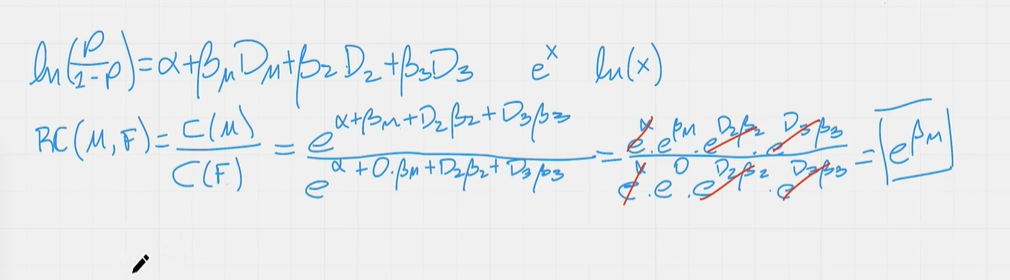

OBS: Lembrar que os coeficientes dessa expressão são representados nos coeficientes mostrados na tabela summary().

A partir da relação matemática que pode-se notar é desse modo que se constrói a relação de chance de um termo a outro com base na regressão logística. Nesse caso, como se refere a relação entre homem e mulher, colocamos no numerador o *eta masculino* e o *eta feminino*, por assim dizer. Pela propriedade do expoente, podemos escrever o eta da forma que se mostra à direita, permitindo-nos "cortar" os termos equivalentes, restando apenas o e^(beta de m) sobre e^0, que resulta em um.

Assim, compreendemos que quando relacionamos a chance de um evento a partir de outro, consideramos apenas os termos que sejam diferentes na expressão.

In [19]:
reglog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Thu, 18 Jan 2024   Pseudo R-squ.:                  0.3038
Time:                        15:12:41   Log-Likelihood:                -413.06
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 9.314e-77
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.1476      0.278      7.716      0.000       1.602       2.693
sex[T.male]       -2.6246      0.185    -14.170      0.000      -2.988      -2.262
C(pclass)[T.2]    -0.7366      0.271     -2.717      0.007      -1.268      -0.205
C(pclass)[T.3]    -1.7903      0.252     -7.111      0.000      -2.284      -1.297
fare               0.0018      0.002      0.864      0.388      -0.002       0.006
==================================================================================
"""

In [20]:
# Chance de um homem sobreveviver em relação a uma mulher:

# Analisando a tabela acima, nota-se que o único termo que será
# discrepante do eta feminino seria o sex[T.male], tendo em vista
# que esse seria igual a zero, enquanto os demais permanecerão
# iguais, incluindo o interceptor. Desse modo, podemos selecionar
# apenas o termo que se refere ao sexo masculino.

RC_M_F = np.exp(round(-2.6246*100, 2))

In [21]:
print(f"A chance de um homem sobreviver em relação à uma mulher é de {round(RC_M_F * 100, 2)} %")
print("Ou, se preferir ler desse modo:")
print(f"A mulher tem {round((1/ RC_M_F),2)} chances de sobrevivência do que o homem.")

# Para saber quantas vezes alguém tem de algo em relação ao outro, basta
# selecionar a probabilidade ou chance calculado e colocá-lo como denominador
# de um numerador 1.

A chance de um homem sobreviver em relação à uma mulher é de 0.0 %
Ou, se preferir ler desse modo:
A mulher tem 9.658945605259547e+113 chances de sobrevivência do que o homem.


In [22]:
# Calculando a chance de um sobrevivente da terceira classe em relação a um da primeira:

RC_Terceira_Primeira = np.exp(-1.7903)
RC_Terceira_Primeira = round(RC_Terceira_Primeira*100, 2)
RC_Terceira_Primeira

16.69

In [23]:
# Calculando quantas vezes um homem da primeira classe consegue sobreviver
# em relação a um da terceira:

1/ np.exp(-1.7903)

5.991249571675344

In [24]:
print(f"A chance de um homem da terceira classe sobreviver em relação a um pertencente à primeira é de {RC_Terceira_Primeira} %")
print("Ou, se preferir ler desse modo:")
print(f"Um homem da primeira classe tem {round(1/ np.exp(-1.7903),2)} chances de sobrevivência do que um homem da terceira classe.")

A chance de um homem da terceira classe sobreviver em relação a um pertencente à primeira é de 16.69 %
Ou, se preferir ler desse modo:
Um homem da primeira classe tem 5.99 chances de sobrevivência do que um homem da terceira classe.


### 2.5 Qualidade do modelo <a name="2.5"></a>

Eixos de qualidade de um modelo:

- Calibragem: O quanto uma estimativa de probabilidade de evento esta próxima da realidade.
- Discriminação: O quanto o modelo consegue discriminar "eventos" de "não eventos" com probabilidades bem distintas.
- Estabilidade: A qualidade do modelo de ter pouca variabilidade temporal.
- Operacional: O quanto de pode confiar operacionalmente no modelo (consistência dos dados, infra-estrutura confiável, etc).

In [25]:
# Modelo de regressão logística adotado:

# Lembrando que colocando o "C", como fiz em C(pclass), faz
# com que eu categorize a variável.

reglog = smf.logit(" survived ~ sex + C(pclass) + fare"
                   , data=titanic).fit()



Optimization terminated successfully.
         Current function value: 0.463592
         Iterations 6


In [26]:
titanic_semNA.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [27]:
# Excluindo as colunas que são redundantes:

titanic_semNA = titanic_semNA.drop(columns=["alive", "adult_male"], axis=1)

In [28]:
# Modelo:

reglog = smf.logit(" survived ~ sex + C(pclass) + fare"
                   , data=titanic_semNA).fit()

Optimization terminated successfully.
         Current function value: 0.460565
         Iterations 7


In [29]:
# Armazenando na coluna predito os valores que o modelo de regressão logística
# produz a partir das variáveis enlencadas. Os valores estão em decimal, mas
# podem ser lidos como 90%, 40% de ter sobrevevido e assim por diante.

titanic_semNA["predito"] = reglog.predict(titanic_semNA)

titanic_semNA.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,deck,embark_town,alone,predito
1,1,1,female,38.0,1,0,71.2833,C,First,woman,C,Cherbourg,False,0.935075
3,1,1,female,35.0,1,0,53.1000,S,First,woman,C,Southampton,False,0.932854
6,0,1,male,54.0,0,0,51.8625,S,First,man,E,Southampton,True,0.429954
10,1,3,female,4.0,1,1,16.7000,S,Third,child,G,Southampton,False,0.812558
11,1,1,female,58.0,0,0,26.5500,S,First,woman,C,Southampton,True,0.929484


* Etapa da calibragem:

Quero verificar se o modelo está congruente à realidade, de tal modo que o valor predito esteja próximo daquilo que se é observado. Para tanto:

In [30]:
# Criar um novo dataframe, agrupando as colunas survived e predito:

# Mas antes vou criar uma categoria do predito, dividindo-o
# em 5, estabelecendo com isso um intervalo.

cat_pred = pd.qcut(titanic_semNA['predito'], 5, duplicates='drop')

cat_pred.value_counts().sort_index()


(0.187, 0.423]    37
(0.423, 0.457]    37
(0.457, 0.933]    36
(0.933, 0.938]    37
(0.938, 0.96]     37
Name: predito, dtype: int64

In [31]:
# Criando um agrupamento que agrupa o dataframe titanic_semNA com
# cat_pred, que é o intervalo das predições.

group_reg = titanic_semNA.groupby(cat_pred)
group_reg

In [32]:
# Criando uma tabela a partir do agrupamento que me traz a contagem
# das pessoas que sobreviveram

qualid = group_reg[['survived']].count().rename(columns = {'survived': 'contagem'})
qualid

,contagem
predito,
"(0.187, 0.423]",37
"(0.423, 0.457]",37
"(0.457, 0.933]",36
"(0.933, 0.938]",37
"(0.938, 0.96]",37


In [33]:
# Criando uma coluna que me traz os valores médios das predições:

qualid['predito'] = group_reg['predito'].mean()
qualid

,contagem,predito
predito,,
"(0.187, 0.423]",37,0.386865
"(0.423, 0.457]",37,0.437435
"(0.457, 0.933]",36,0.688689
"(0.933, 0.938]",37,0.935262
"(0.938, 0.96]",37,0.948740


In [34]:
# Adicionando à tabela a coluna que me traga a média percentual
# dos sobreviventes, por meio do agrupamento anteriormente realizado,
# o qual está agrupando todos os termos presentes no dataframe, segundo
# a ótica da cat_pred.

qualid['pct_sobrev'] = group_reg['survived'].mean()
qualid

,contagem,predito,pct_sobrev
predito,,,
"(0.187, 0.423]",37,0.386865,0.432432
"(0.423, 0.457]",37,0.437435,0.405405
"(0.457, 0.933]",36,0.688689,0.638889
"(0.933, 0.938]",37,0.935262,1.000000
"(0.938, 0.96]",37,0.948740,0.918919


* Discriminação:

O quanto o modelo consegue discriminar, compreender eventos e não eventos de forma distinta:

Text(0.5, 0, 'Grupo')

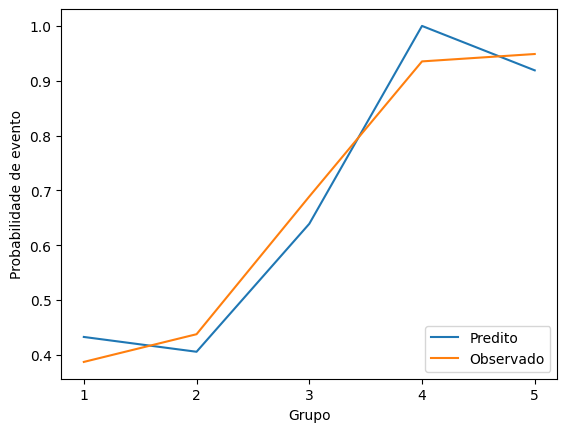

In [35]:
# Visualizando a curva da predição em relação à observada:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_sobrev'].plot(label='Predito')
ax = qualid['predito'].plot(label='Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

# A partir desse gráfico, consegue-se observar que o modelo, a partir da sua
# previsão, aproxima-se daquilo que se é observado.


* Curva ROC:

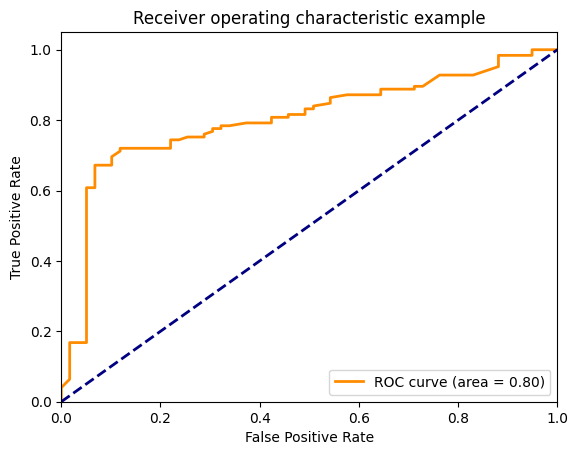

In [37]:
from sklearn.metrics import roc_curve
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(titanic_semNA['survived'],
                                         titanic_semNA['predito'])

plt.figure()
lw = 2

fpr, tpr, thresholds = metrics.roc_curve(titanic_semNA['survived'],
                                         titanic_semNA['predito'])

auc_ = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Além do gráfico acima mostrado, há outro, que estará abaixo, que nos permmite
# saber a discriminação do modelo, o quão eficiente ele é, a partir da curva ROC.
# Essa curva, com base em sua área, permiti compreender o quão eficiente está o
# modelo, considerado bom, caso a sua área seja maior que 50%.

* Curva KS:

Text(0, 0.5, 'Função Distribuição Acumulada')

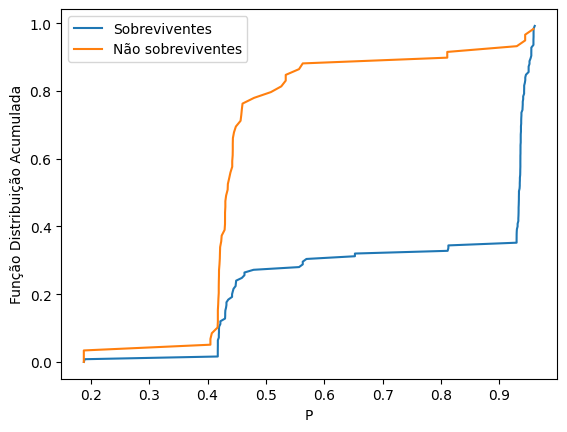

In [39]:
# Há outra forma de compreender o modelo, sendo por meio da probabilidade
# de um evento ocorrer em relação ao outro.

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

score_pop1 = titanic_semNA.loc[titanic_semNA['survived']==1,'predito']
ax.plot(np.sort(score_pop1),
        np.linspace(0, 1, len(score_pop1), endpoint=False), label='Sobreviventes')

score_pop2 = titanic_semNA.loc[titanic_semNA['survived']!=1,'predito']
ax.plot(np.sort(score_pop2),
        np.linspace(0, 1, len(score_pop2),
                    endpoint=False), label='Não sobreviventes')
ax.legend()

ax.set_xlabel('P')
ax.set_ylabel('Função Distribuição Acumulada')

# Esse gráfico mostra que a probabilidade de não haver sobreviventes é maior
#, próximo de 80%, quando que ao mesmo tempo o de sobreviventes é pouco mais
# de 20%, inicialmente.

# Esse gráfico é útil para compreender a evolução das "ocorrências probabilísticas"
# de um evento e de outro.

# Quanto maior for a área da curva, maior será, considera-se, a taxa de discrimi -
# nação do modelo, o que significa que ele é eficiente em saber discriminar um
# evento de outro.

* Indicadores do modelo:

In [41]:
from sklearn import metrics
from scipy.stats import ks_2samp

acc = metrics.accuracy_score(titanic_semNA['survived'],
                             titanic_semNA['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(titanic_semNA['survived'],
                                         titanic_semNA['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(titanic_semNA.loc[titanic_semNA['survived'] == 1, 'predito'],
              titanic_semNA.loc[titanic['survived'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 74.46%
KS: 60.42% 
AUC: 80.28% 
GINI: 60.57%
